In [1]:
import requests
from lxml import etree
url = "https://www.bitpush.news/covid19/"
headers = {
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) "
        "Chrome/95.0.4638.69 Safari/537.36 "
}
# 用 requests 发起 GET 请求，并获取请求的返回结果
html = requests.get(url, headers=headers).text
# print(html)
# 创建一个 lxml 对象，encoding utf-8
etree.HTMLParser(encoding="utf-8")
# 解析结果
doc = etree.HTML(html)

In [2]:
# XML process
# 地区
state = doc.xpath('(//div[@class="table_container"])[2]//tbody/tr/td/span/text()')
# 确诊人数
person = doc.xpath('(//div[@class="table_container"])[2]//tbody/tr/td[2]/text()')
# 去除逗号
person = [x.replace(",", "") for x in person]
# 死亡人数
death = doc.xpath('(//div[@class="table_container"])[2]//tbody/tr/td[3]/text()')
# 去除逗号
death = [x.replace(",", "") for x in death]

# 打包数据
message = list(zip(state, person, death))
message

[('加州', '5959487', '76983'),
 ('德克萨斯', '4946880', '76364'),
 ('佛罗里达', '4486276', '62622'),
 ('纽约', '3929750', '60276'),
 ('伊利诺伊', '2382423', '30794'),
 ('宾夕法尼亚', '2206899', '37522'),
 ('俄亥俄', '2151829', '30072'),
 ('乔治亚', '1928942', '31521'),
 ('密西根', '1855658', '29955'),
 ('北卡', '1816380', '19619'),
 ('新泽西', '1782463', '29374'),
 ('田纳西', '1462996', '20941'),
 ('亚利桑那', '1430241', '24586'),
 ('印第安纳', '1314688', '19448'),
 ('马萨诸塞', '1250765', '20510'),
 ('弗吉尼亚', '1220869', '15651'),
 ('威斯康星', '1186066', '11402'),
 ('密苏里', '1075994', '16476'),
 ('明尼苏达', '1064065', '10906'),
 ('南卡', '1048252', '14746'),
 ('科罗拉多', '979437', '10402'),
 ('阿拉巴马', '957848', '16585'),
 ('华盛顿州', '913980', '9974'),
 ('路易斯安那', '908428', '15054'),
 ('肯塔基', '904916', '12319'),
 ('马里兰', '800743', '12107'),
 ('俄克拉荷马', '737593', '12592'),
 ('犹他', '682036', '3887'),
 ('阿肯色', '604843', '9298'),
 ('爱荷华', '596296', '8019'),
 ('密西西比', '586547', '10527'),
 ('堪萨斯', '565288', '7101'),
 ('康涅狄格', '563635', '9281'),
 ('内华达', '5094

In [5]:
import csv
import pandas as pd
# file process
with open("content.csv", "w") as f:
    w = csv.writer(f)
    w.writerows(message)
# 读取数据
df = pd.read_csv("content.csv", names=["state", "person", "death"])
df_show = df.head(15)
df_show

,state,person,death
0,加州,5959487,76983
1,德克萨斯,4946880,76364
2,佛罗里达,4486276,62622
3,纽约,3929750,60276
4,伊利诺伊,2382423,30794
5,宾夕法尼亚,2206899,37522
6,俄亥俄,2151829,30072
7,乔治亚,1928942,31521
8,密西根,1855658,29955
9,北卡,1816380,19619


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
/opt/homebrew/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21152 (\N{CJK UNIFIED IDEOGRAPH-52A0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24030 (\N{CJK UNIFIED IDEOGRAPH-5DDE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24503 (\N{CJK UNIFIED IDEOGRAPH-5FB7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20811 (\N{CJK UNIFIED IDEOGRAPH-514B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew

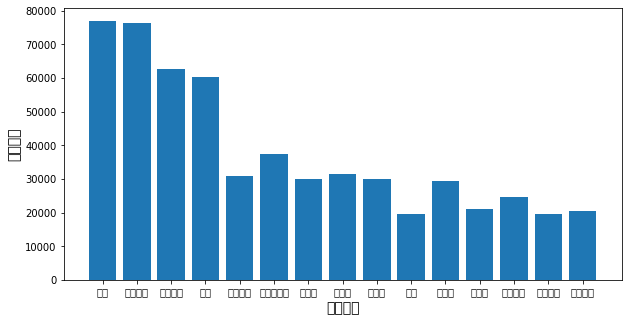

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
# graph process
# 设置中文显示
# 此处 macOS 没有「SimHei」字体，所以使用其他字体
# print(matplotlib.font_manager.fontManager.ttflist)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['figure.figsize'] = (10, 5)  # 设置figure_size尺寸

# x轴坐标
x = df_show["state"].values
# y轴坐标
y = df_show["death"].values
# 绘制柱状图
plt.bar(x, y)
# 设置x轴名称
plt.xlabel("美国各州", fontsize=14)
# 设置x轴名称
plt.ylabel("死亡人数", fontsize=14)
plt.show()